In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
import random
import cv2
from random import shuffle
from PIL import Image, ImageEnhance

In [2]:
raw = Image.open('rle_image_dataset_2/Unet-result.png')
raw=np.array(raw)

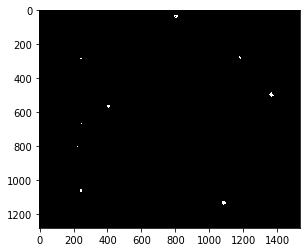

In [3]:
plt.imshow(raw[:,:,0],cmap='gray')

In [4]:
raw=np.array(raw[:,:,0])

In [5]:
from skimage import measure

In [6]:
label_mask = measure.label(raw)

In [7]:
regions = measure.regionprops(label_mask)

In [8]:
regions

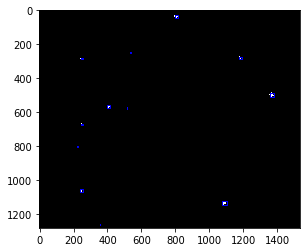

In [9]:
fig, ax = plt.subplots()
ax.imshow(raw, cmap=plt.cm.gray)
file2write=[]
for props in regions:

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1)
    file2write.append(f"Unet-result.png,{minr},{minc},{maxr},{maxc},mitosis \n")
# ax.axis((0, 600, 600, 0))
plt.show()

In [10]:
file2write

['Unet-result.png,27,795,47,817,mitosis \n',
 'Unet-result.png,246,533,250,537,mitosis \n',
 'Unet-result.png,246,1431,247,1433,mitosis \n',
 'Unet-result.png,272,1176,285,1189,mitosis \n',
 'Unet-result.png,280,244,285,254,mitosis \n',
 'Unet-result.png,484,1354,509,1383,mitosis \n',
 'Unet-result.png,556,399,573,417,mitosis \n',
 'Unet-result.png,571,512,576,513,mitosis \n',
 'Unet-result.png,577,512,578,513,mitosis \n',
 'Unet-result.png,666,247,673,254,mitosis \n',
 'Unet-result.png,798,221,805,228,mitosis \n',
 'Unet-result.png,1052,239,1068,255,mitosis \n',
 'Unet-result.png,1121,1073,1144,1104,mitosis \n',
 'Unet-result.png,1259,354,1262,357,mitosis \n']

In [11]:
file1 = open("annotation.txt","w")

In [12]:
file1.writelines(file2write) 
file1.close() 